<a href="https://colab.research.google.com/github/krucx/ML_from_scratch/blob/main/LinearRegression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("/content/weight-height.csv")
df.head(10)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [ ]:
df = pd.get_dummies(data=df,columns=['Gender'])
df=df.drop(['Gender_Female'],axis=1)

In [ ]:
height_mean = df['Height'].mean()
height_std = df['Height'].std()
weight_mean = df['Weight'].mean()
weight_std = df['Weight'].std()
df['Height'] = (df['Height']-height_mean)/height_std
df['Weight'] = (df['Weight']-weight_mean)/weight_std
df

,Height,Weight,Gender_Male
0,1.943964,2.505672,1
1,0.627505,0.027099,1
2,2.012343,1.597726,1
3,1.393991,1.825131,1
4,0.913375,1.398680,1
...,...,...,...
9995,-0.050658,-0.768113,0
9996,0.181830,0.293616,0
9997,-0.649655,-1.026678,0
9998,0.693090,0.075124,0


In [ ]:
X_t = pd.concat([df['Height'],df['Gender_Male']],axis=1).to_numpy()
X = np.append(X_t,np.ones((X_t.shape[0],1)),axis=1)
Y = df['Weight'].to_numpy()
Y.reshape((X.shape[0]),1)

array([[ 2.50567168],
       [ 0.02709928],
       [ 1.59772634],
       ...,
       [-1.02667831],
       [ 0.07512369],
       [-1.48843281]])

In [ ]:
print(Y.shape)
print(X.shape)

(10000,)
(10000, 3)


In [ ]:
def mse(X,Y,theta):
  return (1/(2*X.shape[0]))*np.sum((np.dot(X,theta.T)-Y)**2)

In [ ]:
# Using formulae for doing this theta = (X'X)^-1.X'Y
def linearReg_f(X,Y):
  theta_f = np.dot(np.linalg.pinv(np.dot(X.T,X)),np.dot(X.T,Y))
  loss = mse(X,Y,theta_f)
  return theta_f,loss

In [ ]:
theta_f,loss = linearReg_f(X,Y)
print(loss)
print(theta_f)

0.04862105094764168
[ 0.716212    0.60350833 -0.30175417]


In [ ]:
# Using formulae for doing this theta = (X'X)^-1.X'Y
def linearReg_gd(X,Y,theta,epochs=1000,l_r=0.3):
  loss = []
  for i in range(epochs):
    theta_update = (1/X.shape[0])*np.dot(X.T,(np.dot(X,theta.T)-Y))
    theta = theta - l_r*theta_update
    loss.append(mse(X,Y,theta))
  return theta,loss

[ 0.716212    0.60350833 -0.30175417]
0.04862105094764168


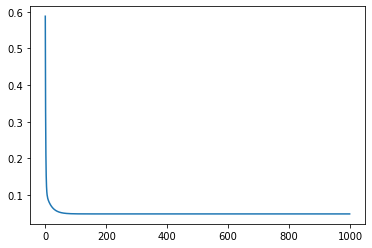

In [ ]:
epochs=1000
theta = np.random.randn(X.shape[1])
theta,loss = linearReg_gd(X,Y,theta,epochs)
plt.plot(range(epochs),loss)
print(theta)
print(loss[-1])

In [ ]:
#conclusion i got same results with formulae and gradient descent 
def testRandomlyOnDataset(X,Y,theta):
  index = np.random.randint(X.shape[0])
  prediction = np.dot(X[index],theta.T)
  pred_wt = prediction*weight_std + weight_mean
  actual_wt = Y[index]*weight_std + weight_mean
  print("Prediction {}   Expected {}".format(pred_wt,actual_wt))

In [ ]:
testRandomlyOnDataset(X,Y,theta)

Prediction 196.46069190857722   Expected 197.341247176261


In [ ]:
def visualize_results(X,Y,theta):
  male_height = []
  male_weight = []
  female_height = []
  female_weight = []
  male_weight_pred = []
  female_weight_pred = []
  count=0
  for i in X:
    if i[1]==1:
      male_height.append(i[0]*height_std + height_mean)
      male_weight_pred.append(np.dot(i,theta.T)*weight_std + weight_mean)
      male_weight.append(Y[count]*weight_std + weight_mean)
    else:
      female_height.append(i[0]*height_std + height_mean)
      female_weight_pred.append(np.dot(i,theta.T)*weight_std + weight_mean)
      female_weight.append(Y[count]*weight_std + weight_mean)
    count+=1
  plt.plot(male_height,male_weight_pred,c='r')
  plt.scatter(x=male_height,y=male_weight,c='b')
  plt.title("For Males")
  plt.xlabel("Height")
  plt.ylabel("Weight")
  plt.show()
  plt.plot(female_height,female_weight_pred,c='y')
  plt.scatter(x=female_height,y=female_weight,c='g')
  plt.title("For Females")
  plt.xlabel("Height")
  plt.ylabel("Weight")
  plt.show()
  plt.plot(male_height,male_weight_pred,c='r')
  plt.scatter(x=male_height,y=male_weight,c='b')
  plt.plot(female_height,female_weight_pred,c='y')
  plt.scatter(x=female_height,y=female_weight,c='g')
  plt.title("Combined")
  plt.xlabel("Height")
  plt.ylabel("Weight")
  plt.show()

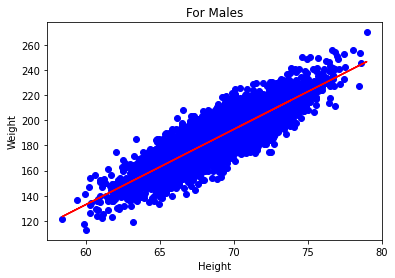

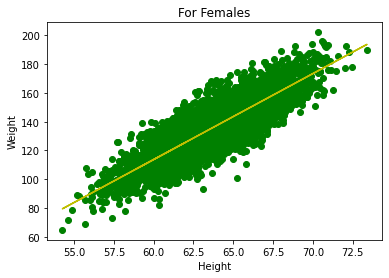

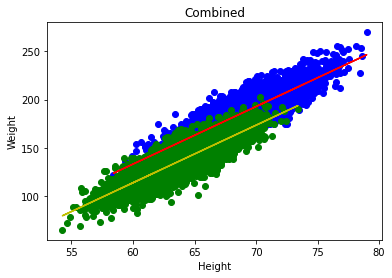

In [ ]:
visualize_results(X,Y,theta)

In [ ]:
# Using scikit learn
reg = LinearRegression().fit(X_t, Y)
print(np.append(reg.coef_,reg.intercept_))

[ 0.716212    0.60350833 -0.30175417]
